# Analyse de sentiments des tweets

### Description des données
La table contient des données textuelles associées à des sentiments exprimés sur les réseaux sociaux. Elle est sera utilisée pour entraîner et évaluer un modèle de classification de sentiment associé aux tweet.

La table comprend les colonnes suivantes :

1. target: Cette colonne représente la polarité du sentiment exprimé dans le texte. Elle peut prendre deux valeurs :

    Valeur 0 : correspond à un sentiment négatif.
    Valeur 4 : correspond à un sentiment positif.
2. ids: Identifiant unique associé à chaque enregistrement.
3. date: La date et l'heure de la publication du texte.
4. flag: Un marqueur indiquant la provenance des données. Il peut prendre les valeurs suivantes :
    "NO_QUERY" : indique que les données ne proviennent pas d'une requête spécifique.
    Autres valeurs : peuvent indiquer la requête ou l'origine des données.
5. user: Le nom d'utilisateur de l'auteur du texte.
6. text: Le texte du tweet ou du message exprimant le sentiment.

In [1]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import pandas as pd 
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [80]:
# Base de données
columns = ['target', 'ids','date', 'flag', 'user', 'text']

df = pd.read_csv("twitter.csv",encoding='ISO-8859-1', names=columns)
df

,target,ids,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
...,...,...,...,...,...,...
1599995,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599996,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599997,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599998,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   target  1600000 non-null  int64 
 1   ids     1600000 non-null  int64 
 2   date    1600000 non-null  object
 3   flag    1600000 non-null  object
 4   user    1600000 non-null  object
 5   text    1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


In [56]:
df.isna().sum().sum()

np.int64(0)

In [57]:
df = df[['target', 'text']]
df

,target,text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."
...,...,...
1599995,4,Just woke up. Having no school is the best fee...
1599996,4,TheWDB.com - Very cool to hear old Walt interv...
1599997,4,Are you ready for your MoJo Makeover? Ask me f...
1599998,4,Happy 38th Birthday to my boo of alll time!!! ...


In [58]:
df.target.unique()

array([0, 4])

In [59]:
# Replancons le 4 par le 1
df.loc[df['target']==4, 'target'] = 1
df.target.unique()

array([0, 1])

In [60]:
target_counts = df['target'].value_counts()
target_counts

target_proportions = df['target'].value_counts(normalize=True)

Text(0, 0.5, "Valeur de la variable d'interet")

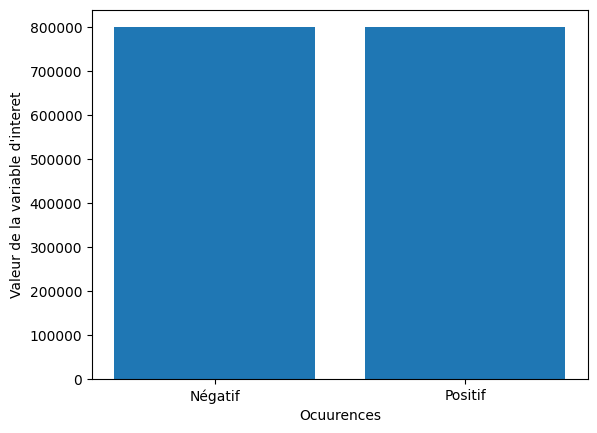

In [61]:
plt.bar(target_counts.index, target_counts)
plt.xticks(target_counts.index, ['Négatif', 'Positif'])
plt.xlabel('Ocuurences')
plt.ylabel("Valeur de la variable d'interet")

In [62]:
Tweet_positif = df[df['target']==1].sample(n=5000, random_state=42)
Tweet_negatif = df[df['target']==0].sample(n=5000, random_state=42)

df_select = pd.concat([Tweet_positif, Tweet_negatif])
df_select = df_select.reset_index(drop=True)
df_select

,target,text
0,1,Is lookin 4ward to a long weekend really dont...
1,1,#myweakness Is music and i live to meet the p...
2,1,figured out the Internet on my new iPod
3,1,@hillsongunited can't wait to worship with you...
4,1,@sillybeggar Congrats James !! I'm sure the bo...
...,...,...
9995,0,say some tehilim.
9996,0,is wondering what to write on twitter............
9997,0,"so my iPod froze, and i have a 3 hour drive to..."
9998,0,Gettin up now


In [64]:
df_select = df_select[['target', 'text']]
df_select

,target,text
0,1,Is lookin 4ward to a long weekend really dont...
1,1,#myweakness Is music and i live to meet the p...
2,1,figured out the Internet on my new iPod
3,1,@hillsongunited can't wait to worship with you...
4,1,@sillybeggar Congrats James !! I'm sure the bo...
...,...,...
9995,0,say some tehilim.
9996,0,is wondering what to write on twitter............
9997,0,"so my iPod froze, and i have a 3 hour drive to..."
9998,0,Gettin up now


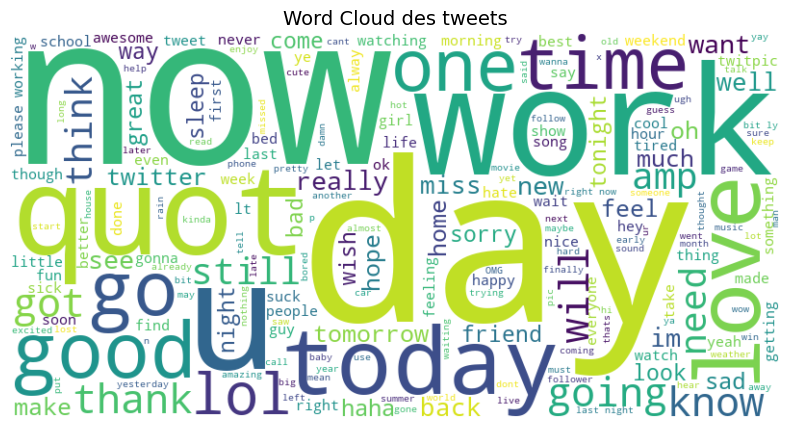

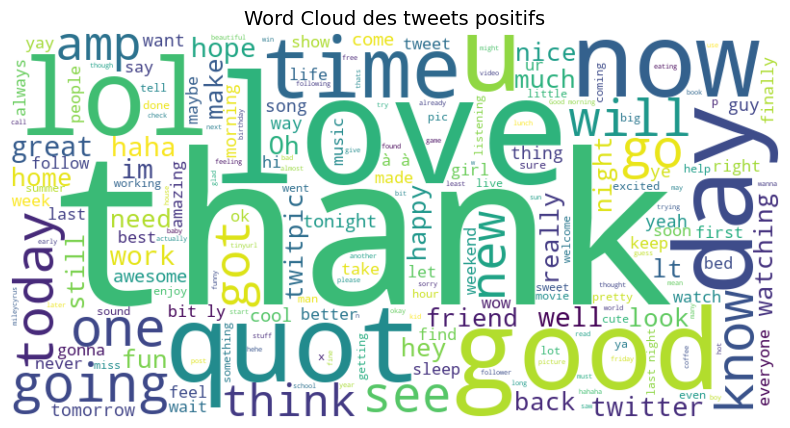

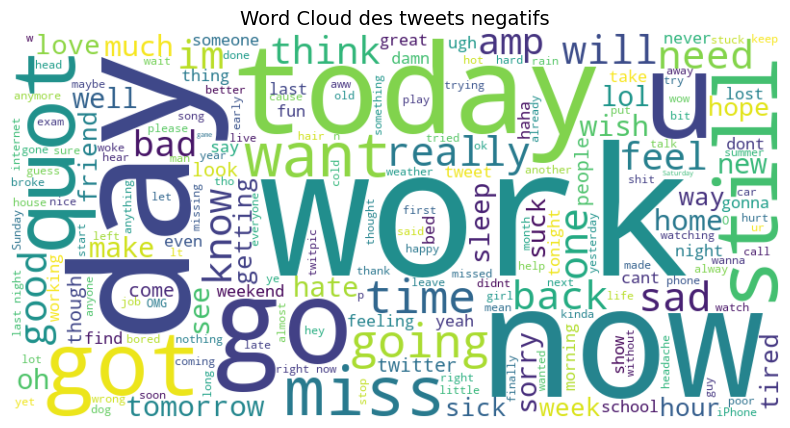

In [65]:
#Les mots les plus frequents

def generate_wordcloud(tweets, titre):
    tout_texte = ' '.join(tweets)
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(tout_texte)
    plt.figure(figsize=(10,5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(titre, fontsize=14)
    plt.axis('off')
    plt.show()

#Generer le word cloud
generate_wordcloud(df_select['text'], 'Word Cloud des tweets')
generate_wordcloud(Tweet_positif['text'], 'Word Cloud des tweets positifs')
generate_wordcloud(Tweet_negatif['text'], 'Word Cloud des tweets negatifs')

### 2. Prétraitement des données

In [66]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

In [67]:
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')
#nltk.download('punkt_tab') 

def clean_text(text):
    #Supression des caractères speciaux et de la ponctuation
    text = re.sub(r"[^\w\s]", "", text)

    #Conversion en miniscules
    text = text.lower()

    #Tokenisation du texte
    tokens = word_tokenize(text)

    #Suppression des mots vides
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]

    # Jointure des tokens en une seule chaine
    cleaned_text = ' '.join(tokens)

    return cleaned_text

df_select['texte_nettoye'] = df_select['text'].apply(clean_text)

df_select

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\weuz2\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\weuz2\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\weuz2\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,target,text,texte_nettoye
0,1,Is lookin 4ward to a long weekend really dont...,lookin 4ward long weekend really dont want go ...
1,1,#myweakness Is music and i live to meet the p...,myweakness music live meet people make
2,1,figured out the Internet on my new iPod,figured internet new ipod
3,1,@hillsongunited can't wait to worship with you...,hillsongunited cant wait worship guys tonight ...
4,1,@sillybeggar Congrats James !! I'm sure the bo...,sillybeggar congrats james im sure book going ...
...,...,...,...
9995,0,say some tehilim.,say tehilim
9996,0,is wondering what to write on twitter............,wondering write twitter hhhmmm theres nothing ...
9997,0,"so my iPod froze, and i have a 3 hour drive to...",ipod froze 3 hour drive tomorrow
9998,0,Gettin up now,gettin


### 3. Conversion des textes en numerique

In [71]:
from sklearn.feature_extraction.text import TfidfVectorizer

#Instance du vectoriseur
vectorizer = TfidfVectorizer()

features = vectorizer.fit_transform(df_select['texte_nettoye'])

#Conversion
features = features.toarray()

print("Dimensions de la matrice de caracteristique: ", features.shape)

Dimensions de la matrice de caracteristique:  (10000, 19836)


In [72]:
features

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], shape=(10000, 19836))

### 4. Modélisation 

In [73]:
from sklearn.model_selection import train_test_split

# Diviser les données en ensembles d'entraînement et de test de façon stratifiée
X_train, X_test, y_train, y_test = train_test_split(features, df_select['target'], test_size=0.2, stratify=df_select['target'], random_state=42)

In [74]:
model = LogisticRegression()
model.fit(X_train, y_train)

y_train_pred = model.predict_proba(X_train)[:,1]
y_test_pred = model.predict_proba(X_test)[:,1]

In [76]:
from sklearn.metrics import roc_curve, auc, accuracy_score, precision_score, recall_score, f1_score

fpr_train, tpr_train, _ = roc_curve(y_train, y_train_pred)
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_pred)

auc_train = auc(fpr_train, tpr_train)
auc_test = auc(fpr_test, tpr_test)

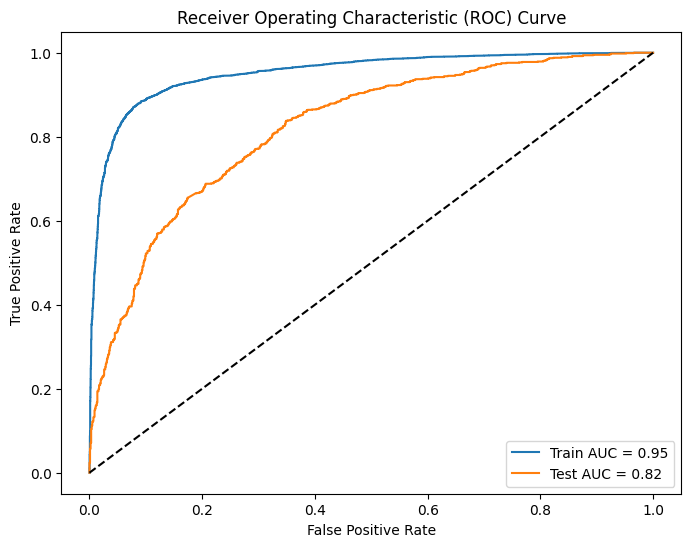

In [77]:
# Tracer la courbe ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr_train, tpr_train, label='Train AUC = {:.2f}'.format(auc_train))
plt.plot(fpr_test, tpr_test, label='Test AUC = {:.2f}'.format(auc_test))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [78]:
# Performance
train_accuracy = accuracy_score(y_train, model.predict(X_train))
train_precision = precision_score(y_train, model.predict(X_train))
train_recall = recall_score(y_train, model.predict(X_train))
train_f1 = f1_score(y_train, model.predict(X_train))
test_accuracy = accuracy_score(y_test, model.predict(X_test))
test_precision = precision_score(y_test, model.predict(X_test))
test_recall = recall_score(y_test, model.predict(X_test))
test_f1 = f1_score(y_test, model.predict(X_test))

# Créer un tableau des performances
performance_table = pd.DataFrame({
    'Performance': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'Train': [train_accuracy, train_precision, train_recall, train_f1],
    'Test': [test_accuracy, test_precision, test_recall, test_f1]
})

print(performance_table)

  Performance     Train      Test
0    Accuracy  0.891625  0.737000
1   Precision  0.887652  0.726577
2      Recall  0.896750  0.760000
3    F1 Score  0.892178  0.742913
